In [1]:
import requests

In [2]:
username = 'username'
query = 'https://myanimelist.net/malappinfo.php?u=%s&status=all&type=anime' % username
r = requests.get(query)
if r.status_code != requests.codes.ok:
    print ("Error processing request. Try again")
    import sys; sys.exit()

In [3]:
from lxml import etree
doc = etree.fromstring(r.content)
titles = doc.xpath('.//series_title/text()')
ratings = doc.xpath('.//my_score/text()')

In [4]:
from itertools import compress
mask = [rating != '0' for rating in ratings]
seen_titles = list(compress(titles, mask))
seen_ratings = list(map(int, compress(ratings, mask)))

In [5]:
uid = doc.xpath('.//user_id/text()')


Use MAL credentials to get images. 

In [6]:
username = 'username'
password = 'password'

Try getting image information for each show

In [31]:
import time

for title in seen_titles:
    title1 = "+".join( title.split() )
    query = 'https://%s:%s@myanimelist.net/api/anime/search.xml?q=%s' % (username, password, title1)
    r = requests.get(query)

    while r.status_code != requests.codes.ok:
        r = requests.get(query)
        time.sleep(1.0)    # don't overload their server...


    from PIL import Image
    import urllib.request
    import io

    %matplotlib inline

    with urllib.request.urlopen(URL) as url:
        f = io.BytesIO(url.read())

    img = Image.open(f, 'r')
    width, height = img.size   # Get dimensions

    print (title)


Cowboy Bebop
Hachimitsu to Clover
Neon Genesis Evangelion
Neon Genesis Evangelion: The End of Evangelion
Fullmetal Alchemist
Mononoke Hime
Sen to Chihiro no Kamikakushi
Samurai Champloo
Genshiken
Serial Experiments Lain
Fullmetal Alchemist: The Conqueror of Shamballa
Howl no Ugoku Shiro
Mushishi
Majo no Takkyuubin
Tenkuu no Shiro Laputa
Tonari no Totoro
Digimon Adventure
Kaze no Tani no Nausicaä
Hotaru no Haka
Suzumiya Haruhi no Yuuutsu
Ouran Koukou Host Club
Digimon Tamers
Sennen Joyuu
Hachimitsu to Clover II
NHK ni Youkoso!
Digimon Adventure 02
Pokemon Advanced Generation: Mew to Hadou no Yuusha Lucario
Death Note
Code Geass: Hangyaku no Lelouch
Byousoku 5 Centimeter
Nodame Cantabile
Tengen Toppa Gurren Lagann
Clannad
Toki wo Kakeru Shoujo
Baccano!
Gake no Ue no Ponyo
Code Geass: Hangyaku no Lelouch R2
ef: A Tale of Memories.
Ookami to Koushinryou
Clannad: Mou Hitotsu no Sekai, Tomoyo-hen
Clannad: After Story
Toradora!
Suzumiya Haruhi no Yuuutsu (2009)
Nodame Cantabile: Paris-hen
ef:

In [25]:
title = 'Neon Genesis Evangelion'
title1 = "+".join( title.split() )
query = 'https://%s:%s@myanimelist.net/api/anime/search.xml?q=%s' % (username, password, title1)
r = requests.get(query)
if r.status_code != requests.codes.ok:
    r = requests.get(query)
    print ("Error processing request. Try again")

In [26]:
from lxml import etree
doc = etree.fromstring(r.content)
image = doc.xpath('.//image/text()')
URL = image[0]

In [17]:
from PIL import Image
import urllib.request
import io

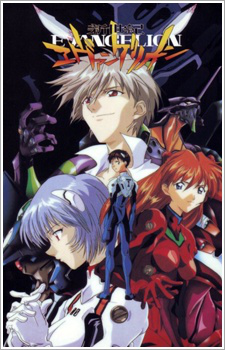

In [18]:
%matplotlib inline

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f, 'r')
img

We'll need to crop the image if necessary.

In [54]:
width, height = img.size   # Get dimensions
new_width = 224
new_height = 224

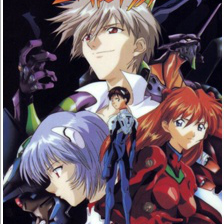

In [63]:
left = int((width - new_width)/2)
top = int((height - new_height)/2)
right = (left+ new_width)
bottom = (top + new_height)

cropped = np.array(img.crop((left, top, right, bottom)))
img.crop((left, top, right, bottom))

In [64]:
np.shape(cropped)

(224, 224, 3)

In [65]:
img.crop((left, top, right, bottom)).size

(224, 224)

In [66]:
np.shape(cropped[None,:])

(1, 224, 224, 3)